In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv('titanic-train.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_data.shape

(891, 12)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
#tells how much null entries are there in each column
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Handling Missing elements
* Cabin doesn't matter
* Age needs attention

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

### Distribution of passengers by age

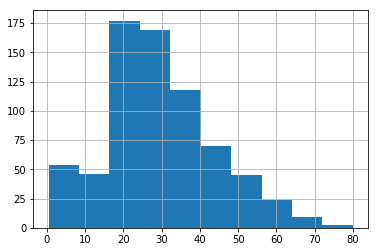

In [17]:
#drop na rows of age & show histogram
train_data['Age'].dropna().hist()

#### Predict missing age using linear regression

In [5]:
#Only data which has age present in it
valid_age_data = train_data[train_data.Age.notnull()]

In [8]:
valid_age_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
age_data = valid_age_data[['Survived','Pclass','Sex','SibSp','Parch','Fare','Embarked','Age']]

In [13]:
age_data.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
0,0,3,male,1,0,7.2500,S,22.0
1,1,1,female,1,0,71.2833,C,38.0
2,1,3,female,0,0,7.9250,S,26.0
3,1,1,female,1,0,53.1000,S,35.0
4,0,3,male,0,0,8.0500,S,35.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [16]:
#split api
from sklearn.model_selection import train_test_split

In [18]:
#feature data
age_X = age_data[['Survived','Pclass','Sex','SibSp','Parch','Fare','Embarked']]
#target data
age_Y = age_data['Age']

In [25]:
age_train_X, age_test_X, age_train_Y, age_test_Y,  = train_test_split(age_X,age_Y)

In [ ]:
### Feature data - survived, Pclass, sex, SibSp, Parch, Embarked
### Target data - Age

In [24]:
age_test_Y.shape

(179,)

In [26]:
age_train_X.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
315,1,3,female,0,0,7.8542,S
220,1,3,male,0,0,8.0500,S
586,0,2,male,0,0,15.0000,S
806,0,1,male,0,0,0.0000,S
267,1,3,male,1,0,7.7750,S


### Using Linear Regression to find the best model to predict age

In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def AgeRegression(degree):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(fit_intercept=True))

In [30]:
age_train_X.Survived.unique()

array([1, 0], dtype=int64)

In [31]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le = LabelEncoder()
age_train_X['Sex'] =le.fit_transform(age_train_X.Sex)

C:\Users\ZekeLabs\Anaconda3-N\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [42]:
age_train_X.groupby('Embarked').size()

Embarked
0     93
1     16
2    426
dtype: int64

In [44]:
age_train_X.fillna('S', inplace=True)
le = LabelEncoder()
age_train_X['Embarked'] =le.fit_transform(age_train_X.Embarked)

C:\Users\ZekeLabs\Anaconda3-N\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
C:\Users\ZekeLabs\Anaconda3-N\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
age_train_X.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
315,1,3,0,0,0,7.8542,2
220,1,3,1,0,0,8.0500,2
586,0,2,1,0,0,15.0000,2
806,0,1,1,0,0,0.0000,2
267,1,3,1,1,0,7.7750,2


In [54]:
models = []
for degree in [1,2,3,6,7]:
    model = AgeRegression(degree)
    model.fit(age_train_X,age_train_Y)
    y_pred = model.predict(age_train_X)
    models.append(model)
    print (degree, r2_score(age_train_Y,y_pred))

1 0.267462122847
2 0.233290845185
3 0.512861744744
6 0.685378282505
7 0.596725117339


In [55]:
#Find all the rows for which age is missing
invalid_age_data = train_data[train_data.Age.isnull()]

In [56]:
invalid_age_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [76]:
age_train = age_train.fillna('S')

In [66]:
v = age_train['Embarked'].dropna().reset_index().index

In [77]:
age_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
Survived    714 non-null int64
Pclass      714 non-null int64
Sex         714 non-null object
SibSp       714 non-null int64
Parch       714 non-null int64
Embarked    714 non-null object
Age         714 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 64.6+ KB


In [78]:
age_train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age
0,0,3,male,1,0,S,22.0
1,1,1,female,1,0,C,38.0
2,1,3,female,0,0,S,26.0
3,1,1,female,1,0,S,35.0
4,0,3,male,0,0,S,35.0


In [79]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

In [80]:
cat_cols = ['Sex','Embarked']

In [81]:
for col in cat_cols:
    age_train[col] = le.fit_transform(age_train[col])

In [82]:
age_train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age
0,0,3,1,1,0,2,22.0
1,1,1,0,1,0,0,38.0
2,1,3,0,0,0,2,26.0
3,1,1,0,1,0,2,35.0
4,0,3,1,0,0,2,35.0


In [85]:
#Create higher degree models
from sklearn.preprocessing import PolynomialFeatures

#Create Linear Regression Model
from sklearn.linear_model import LinearRegression

#Create pipeline for finding the best model
from sklearn.pipeline import make_pipeline

#Splitting data into train-test
from sklearn.model_selection import train_test_split

In [84]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(age_train.iloc[:,:-1],age_train.iloc[:,-1])

In [88]:
X_train.shape

(535, 6)

In [89]:
X_test.shape

(179, 6)

In [90]:
Y_train.shape

(535,)

In [92]:
from sklearn.metrics import mean_squared_error

In [103]:
cost_array = []
all_model = []
for degree in range(1,10):
    model = PolynomialRegression(degree).fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    err = mean_squared_error(Y_test,y_pred)
    cost_array.append(err)
    all_model.append(model)
    print ('Degree {degree} Error {error}'.format(degree=degree,error=err) )
    

Degree 1 Error 152.51105644894483
Degree 2 Error 142.6347072257526
Degree 3 Error 203.15592773952378
Degree 4 Error 6.794851026945954e+22
Degree 5 Error 2.691093505578336e+24
Degree 6 Error 6.846699531079897e+23
Degree 7 Error 3.7245286193780136e+22
Degree 8 Error 7.449149250929914e+18
Degree 9 Error 4.46934745463415e+22


In [97]:
np.argmin(cost_array)

1

In [99]:
min(cost_array)

142.63470722575261

In [102]:
X_test.iloc[0]

Survived    0
Pclass      3
Sex         1
SibSp       0
Parch       0
Embarked    2
Name: 401, dtype: int64

In [106]:
all_model[1].predict([X_test.iloc[0]])

array([ 30.08876343])

In [107]:
Y_test.iloc[0]

26.0

In [108]:
no_age_data = train_data[train_data.Age.isnull()]

In [109]:
no_age_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 5 to 888
Data columns (total 12 columns):
PassengerId    177 non-null int64
Survived       177 non-null int64
Pclass         177 non-null int64
Name           177 non-null object
Sex            177 non-null object
Age            0 non-null float64
SibSp          177 non-null int64
Parch          177 non-null int64
Ticket         177 non-null object
Fare           177 non-null float64
Cabin          19 non-null object
Embarked       177 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 18.0+ KB


In [110]:
del no_age_data['Cabin']

In [111]:
no_age_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 5 to 888
Data columns (total 11 columns):
PassengerId    177 non-null int64
Survived       177 non-null int64
Pclass         177 non-null int64
Name           177 non-null object
Sex            177 non-null object
Age            0 non-null float64
SibSp          177 non-null int64
Parch          177 non-null int64
Ticket         177 non-null object
Fare           177 non-null float64
Embarked       177 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 21.6+ KB


In [113]:
for col in cat_cols:
    no_age_data[col] = le.fit_transform(no_age_data[col])

C:\Users\ZekeLabs\Anaconda3-N\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [116]:
ageless_data = no_age_data[['Survived','Pclass','Sex','SibSp','Parch','Embarked']]

In [117]:
ageless_data['Age'] = all_model[1].predict(ageless_data)

C:\Users\ZekeLabs\Anaconda3-N\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [124]:
ageless_data

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age
5,0,3,1,0,0,1,33.889545
17,1,2,1,0,0,2,33.758685
19,1,3,0,0,0,0,16.789935
26,0,3,1,0,0,0,25.428607
28,1,3,0,0,0,1,27.243060
29,0,3,1,0,0,2,30.088763
31,1,1,0,1,0,0,37.899310
32,1,3,0,0,0,1,27.243060
36,1,3,1,0,0,0,18.446185
42,0,3,1,0,0,0,25.428607


In [119]:
age_train

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age
0,0,3,1,1,0,2,22.0
1,1,1,0,1,0,0,38.0
2,1,3,0,0,0,2,26.0
3,1,1,0,1,0,2,35.0
4,0,3,1,0,0,2,35.0
6,0,1,1,0,0,2,54.0
7,0,3,1,3,1,2,2.0
8,1,3,0,0,2,2,27.0
9,1,2,0,1,0,0,14.0
10,1,3,0,1,1,2,4.0


In [120]:
import pandas as pd

In [122]:
comp_age_data = age_train.append(ageless_data)

In [126]:
comp_age_data.Age

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
18     31.000000
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
27     19.000000
30     40.000000
33     66.000000
34     28.000000
35     42.000000
37     21.000000
38     18.000000
         ...    
718    33.889545
727    27.243060
732    37.981342
738    30.088763
739    30.088763
740    39.789935
760    30.088763
766    46.588763
768    27.768451
773    25.428607
776    33.889545
778    33.889545
783    26.647357
790    33.889545
792    -6.821483
793    46.588763
815    44.311420
825    33.889545
826    30.088763
828    28.446185
832    25.428607
837    30.088763
839    39.039935
846   -16.495221
849    37.899310
859    25.428607
863    -6.821483
868    30.0887

In [128]:
train_data['Age'] = comp_age_data.Age

In [129]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [131]:
del train_data['Cabin']

In [132]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [134]:
train_data = train_data.fillna('S')

In [135]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [136]:
from sklearn import linear_model
lg = linear_model.LogisticRegression()

In [137]:
cat_cols = ['Sex','Ticket','Embarked']
for col in cat_cols:
    train_data[col] = le.fit_transform(train_data[col])

In [165]:
#df_X = train_data.loc[:,(train_data.columns != 'Survived') & (train_data.columns != 'Name')]
df_X = train_data[['Pclass','Sex','Age','SibSp','Parch','Fare']]

In [166]:
df_Y = train_data['Survived']

In [167]:
X_train,X_test,Y_train,Y_test =  train_test_split(df_X, df_Y)

In [168]:
lg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [169]:
y_pred = lg.predict(X_test)

In [170]:
from sklearn.metrics import accuracy_score

In [171]:
accuracy_score(Y_test,y_pred)

0.79372197309417036